The Ackley function is widely used for testing optimization algorithms. In it two dimensional form, as shown in the plot below, it is characterized by a nearly flat outer region, and a large hole at the centre. The function poses a risl for optimization algorithms, particularly hillclimbing algorithms, to be trapped in one of its many local minima.

$f(\mathbf{x}) = -a\exp(-b \sqrt{\frac{1}{d}\Sigma_{i=1}^{d}x_i^2}) - \exp(\frac{1}{d}\Sigma_{i=1}^{d}\cos(cx_i)) + a + \exp(1)$ 

In [72]:
import numpy as np

a = 20
b = 0.2
c = 2 * np.pi

def f(x):
    return -a * np.exp(-b * np.sqrt(np.sum(x**2, axis=-1) / 2)) - np.exp(np.sum(np.cos(c*x), axis=-1) / 2) + a + np.exp(1)

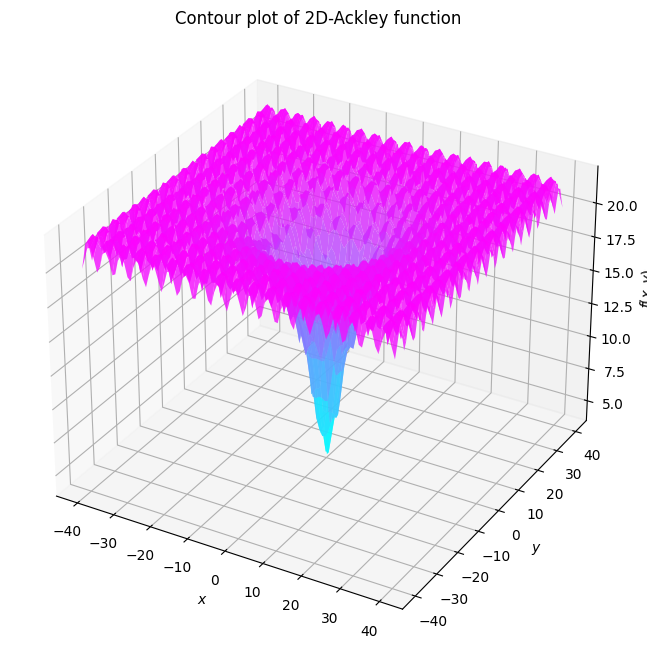

In [73]:
import matplotlib.pyplot as plt

x_vals = np.linspace(-40, 40, 100)
y_vals = np.linspace(-40, 40, 100)

x, y = np.meshgrid(x_vals, y_vals)
xy = np.stack((x, y), axis=2)
z = f(xy)

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, cmap='cool', alpha=0.8)
ax.set_title('Contour plot of 2D-Ackley function')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x, y)$')
plt.show()

# 1.

_Exercise: Implement Gradient Descent(GD) Algorithm (Compute gradient using theory or Numerical Gradient) to minimize the function given above. You can use certain error tolerance/difference between $x_{k+1}$ to $x_k$ to stop the gradient descent_
* _Experiment GD with fixed alphas and different intialization. (You are expected to replicate the results given in figure-2)_
* _Implement GD with backtracking and experiment with different $C_1$ and $\rho$ values._
* _Compare both._

In [74]:
# taken from assignment-1

def numericalGrad(funObj, w, epsilon=0.01):
    m = len(w)
    grad = np.zeros(m)
    for i in range(m):
        wp = np.copy(w)
        wn = np.copy(w)
        wp[i] = w[i] + epsilon
        wn[i] = w[i] - epsilon
        grad[i] = (funObj(wp) - funObj(wn))/(2*epsilon)
    return grad

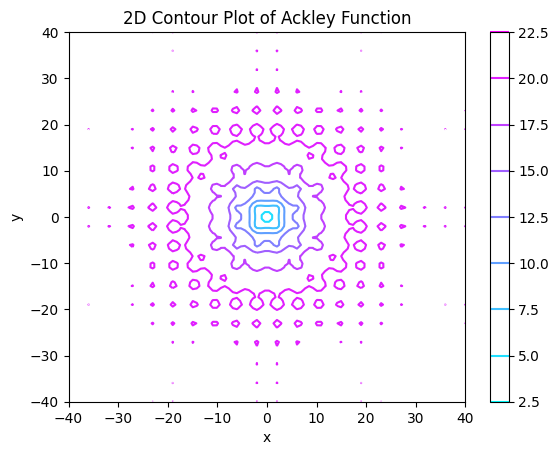

In [75]:
plt.figure()
contour_plot = plt.contour(x, y, z, cmap='cool')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Contour Plot of Ackley Function')
plt.colorbar(contour_plot)
plt.show()

In [76]:
alpha = 0.01

paths = []

def GD(funcObj, w0, alpha=0.001, thresh=1e-5, max_iter=1000):
    path = [w0]
    w_cur = w0
    for _ in range(max_iter):
        grad = numericalGrad(funcObj, w_cur)
        w_nxt = w_cur - alpha * grad
        if np.linalg.norm(grad) < thresh:
            break
        w_cur = w_nxt
        path.append(w_cur)
    paths.append(path)
    return w_nxt

In [77]:
xs = [0.61, 0.61, 0.62]
ys = [0.72, 0.73, 0.76]

GD(f, np.array([0.61, 0.72]), alpha=0.05)

for i in range(len(xs)):
    GD(f, np.array([xs[i], ys[i]]).T)

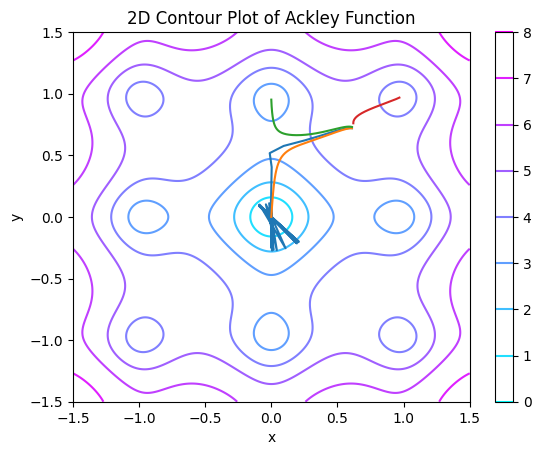

In [78]:
x = np.linspace(-1.5, 1.5, 1_000)
y = np.linspace(-1.5, 1.5, 1_000)
X, Y = np.meshgrid(x, y)
XY = np.stack((X, Y), axis=2)
Z = f(XY)

plt.figure()
contour_plot = plt.contour(X, Y, Z, cmap='cool')

for path in paths:
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1])

plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Contour Plot of Ackley Function')
plt.colorbar(contour_plot)
plt.show()

In [79]:
def armijo_condition_check(funcObj, x, alpha, C, rho):
    grad = numericalGrad(funcObj, x)
    d = -grad / np.linalg.norm(grad)
    return funcObj(x + alpha * d) <= funcObj(x) + C * alpha * np.dot(grad, d) 

In [80]:
paths = []

def gradient_descent_backtracking(funcObj, x0, alpha=0.01,
                                   rho=0.5, c=0.5, max_iter=1000, tol=1e-5):
    x = x0
    path = [x0]
    for _ in range(max_iter):
        grad = numericalGrad(funcObj, x)
        t = 1
        while funcObj(x - t*grad) > funcObj(x) - c*t*np.dot(grad, grad):
            t *= rho
        x_nxt = x - t*grad
        if np.linalg.norm(x_nxt - x) < tol:
            break
        x = x_nxt
        path.append(x)
    paths.append(path)
    return x

In [81]:
xs = [0.61, 0.61, 0.62]
ys = [0.72, 0.73, 0.76]

for i in range(len(xs)):
    gradient_descent_backtracking(f, np.array([xs[i], ys[i]]).T)

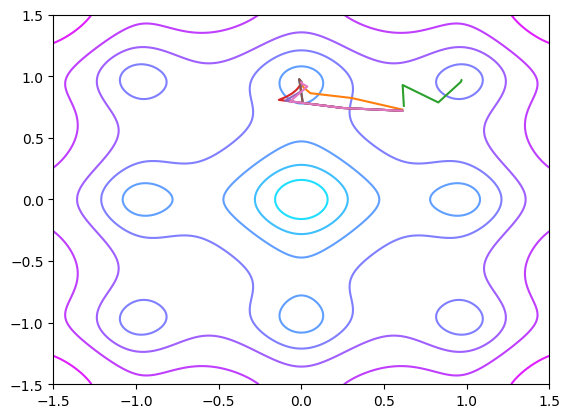

In [82]:
Cs = [0.25, 0.3, 0.4, 0.5]
rhos = [0.1, 0.3, 0.5, 0.7]

for i in range(len(Cs)):
    gradient_descent_backtracking(f, np.array([0.61, 0.72]), rho=rhos[i], c=Cs[i])

plt.figure()
contour_plot = plt.contour(X, Y, Z, cmap='cool')

for path in paths:
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1])

# 2.

_Run your GD algorithm implemented in previous question with and without backtracking for well and ill conditioned functions discussed in the class. Visualize contour plots and updates of independent variables._
* _Try to initialize $x_0$ on the vector along $v_{max}$ and $v_{min}$ and check the convergence with different alpha values._
* _With certain value of alpha $\alpha$ GD with fixed $\alpha$ works better than GD with backtracking. Explain?_

Well conditioned function:

$f_1(x, y) = (x - 3)^2 + (y - 1)^2$

In [84]:
def f1(x, y):
    return (x-3)**2 + (y-1)**2

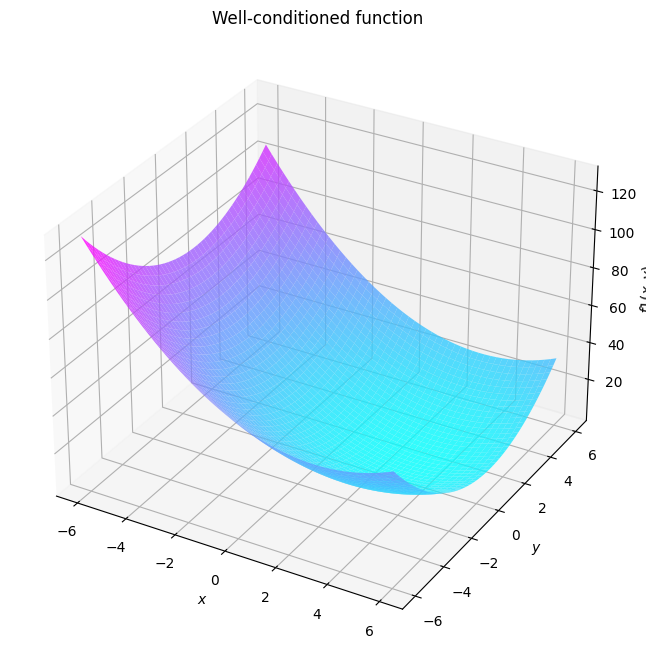

In [85]:
x_vals = np.linspace(-6, 6, 1000)
y_vals = np.linspace(-6, 6, 1000)

x, y = np.meshgrid(x_vals, y_vals)
z = f1(x, y)

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, cmap='cool', alpha=0.8)
ax.set_title('Well-conditioned function')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f1(x, y)$')
plt.show()

Ill-conditioned function
$$